Initializing the workspace:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
housing_df_raw = pd.read_csv("/content/gdrive/Shareddrives/CIS545/housing.csv", encoding="gb2312")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
housing_df_truncated = housing_df_raw.drop(["url", "id", "Cid"], axis=1)

In [4]:
housing_df_truncated.dropna()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318844,116.550348,39.755625,2016-06-10,1.0,6,268.0,22709,118.02,2,2,1,2,中 5,4.0,2006,4,6,0.500,0.0,1.0,0.0,3,33518.0
318845,116.546899,39.755236,2016-06-09,1.0,8,355.5,26491,134.20,3,2,1,2,中 9,3.0,2009,4,6,0.500,1.0,1.0,0.0,3,36545.0
318846,116.546899,39.755236,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318848,116.497256,39.804081,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0


In [5]:
housing_df_truncated.dtypes

Lng                    float64
Lat                    float64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [6]:
# Some observations
# 1. Floor. 高中低+数字, actually there are 2 features here: the type of building (by level) and the specific floor
# 2. construction time. Maybe filtering the 未知 cases?
housing_df_truncated[housing_df_truncated["constructionTime"] == "未知"]
# So there are ~20000 buildings where the construction time are unknown. Maybe some analysis on this?
# Recent buildings are likely to have a precise building date.

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
41,116.232365,40.235529,2016-08-03,546.0,6,170.0,22078,77.00,2,1,1,1,低 6,4.0,未知,1,2,0.333,0.0,1.0,0.0,6,35347.0
82,116.249496,40.221791,2016-07-26,457.0,4,360.0,24507,146.90,3,2,1,2,低 7,4.0,未知,4,2,0.500,0.0,1.0,0.0,6,37612.0
101,116.523870,39.923283,2016-07-16,430.0,3,470.0,32794,143.32,1,0,0,0,中 32,1.0,未知,3,6,0.500,1.0,1.0,1.0,7,30864.0
158,116.430012,40.066244,2016-10-31,487.0,52,580.0,20579,281.85,5,2,1,3,底 6,4.0,未知,3,2,0.500,0.0,1.0,0.0,6,39940.0
160,116.520858,39.918846,2016-07-28,392.0,222,330.0,29483,111.93,3,2,1,1,顶 6,4.0,未知,2,2,0.500,0.0,1.0,1.0,7,56752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318825,116.508181,39.807662,2016-06-04,NaN,9,70.0,20984,33.36,1,0,1,1,中 23,1.0,未知,3,6,0.200,1.0,0.0,1.0,3,28609.0
318828,116.497474,39.810115,2016-06-10,1.0,7,98.5,27218,36.19,1,0,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0
318833,116.497474,39.810115,2016-05-22,1.0,3,147.0,26602,55.26,1,1,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0
318839,116.497474,39.810115,2016-05-28,1.0,1,145.0,26221,55.30,1,1,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0


In [7]:
housing_df_cleaned = housing_df_truncated.dropna()[housing_df_truncated["constructionTime"] != "未知"]
housing_df_cleaned

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318842,116.508181,39.807662,2016-06-10,1.0,3,124.0,37702,32.89,1,1,1,1,高 21,1.0,2008,1,6,0.200,1.0,0.0,1.0,3,28609.0
318844,116.550348,39.755625,2016-06-10,1.0,6,268.0,22709,118.02,2,2,1,2,中 5,4.0,2006,4,6,0.500,0.0,1.0,0.0,3,33518.0
318845,116.546899,39.755236,2016-06-09,1.0,8,355.5,26491,134.20,3,2,1,2,中 9,3.0,2009,4,6,0.500,1.0,1.0,0.0,3,36545.0
318846,116.546899,39.755236,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0


In [8]:
# ZYZ 工作流
# 0. 把无意义的列删除，考虑是否dropna
# 1. 把datetime object变成年月日
# 2. parse the floor column
floor_dict = {"底":1, "低":2, "中":3, "高":4, "顶":5, "未知":6}
def floor_parser(desc):
  lst = desc.split(" ")
  lst[0] = floor_dict[lst[0]]
  return lst

In [9]:
housing_df_cleaned["relativeFloor"] = housing_df_cleaned["floor"].apply(lambda x: floor_parser(x)[0])
housing_df_cleaned["floorOriginal"] = housing_df_cleaned["floor"].apply(lambda x: floor_parser(x)[1])
housing_df_cleaned

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,relativeFloor,floorOriginal
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0,4,26
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0,4,22
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0,3,4
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0,1,21
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318842,116.508181,39.807662,2016-06-10,1.0,3,124.0,37702,32.89,1,1,1,1,高 21,1.0,2008,1,6,0.200,1.0,0.0,1.0,3,28609.0,4,21
318844,116.550348,39.755625,2016-06-10,1.0,6,268.0,22709,118.02,2,2,1,2,中 5,4.0,2006,4,6,0.500,0.0,1.0,0.0,3,33518.0,3,5
318845,116.546899,39.755236,2016-06-09,1.0,8,355.5,26491,134.20,3,2,1,2,中 9,3.0,2009,4,6,0.500,1.0,1.0,0.0,3,36545.0,3,9
318846,116.546899,39.755236,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0,3,5


In [ ]:
housing_df_cleaned.sort_values(by = ['relativeFloor'])

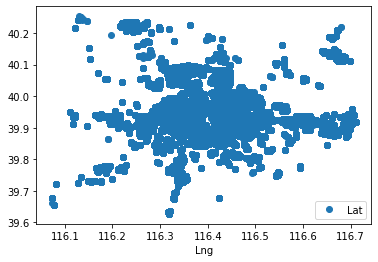

In [11]:
housing_df_cleaned.plot(x='Lng', y='Lat', style='o')

1. Linear Regression
2. NN for regression
3. Compare these?

Linear Regression workflow:
1. PCA, normalize, etc.
2. Train linear regression model by gradient descent? With regulation?
3. Evaluation and other explorations

Visualization Ideas:
1. Overall General Scatter plot, overlaid with the map of Beijing
2. Clustering of geological positions (long, lati)
3. Correlation Matrix between different factors